# Data Exploration

In [23]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [24]:
# loading the datasets
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [25]:
df_train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


## Initial Thoughts and Conclusions 

I begin by creating a 'data exploration spreadsheet', in which I describe the type of each feature (categorical or numerical) and my expectation of its importance in predicting 'Habitability_score'. 

After the analysis to follow, I added my conclusions to the spreadsheet.

## Analysing 'Habitability_score'

In [26]:
# statistics summary
df_train['Habitability_score'].describe()

count    39499.000000
mean        73.482297
std         14.118753
min          7.280000
25%         69.660000
50%         75.760000
75%         82.260000
max        100.000000
Name: Habitability_score, dtype: float64

Looks good! All values are between 0 and 100, with a mean of ~ 73. 

<AxesSubplot:xlabel='Habitability_score', ylabel='Density'>

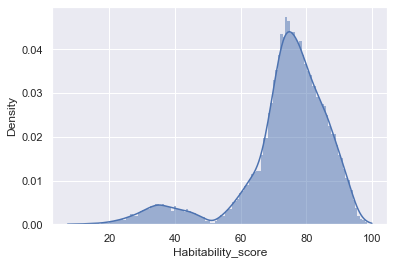

In [27]:
# histogram
sns.histplot(df_train['Habitability_score'], kde=True, stat="density", linewidth=0)

The target variable deviates from the normal distributation. There are 2 peaks - a strong peak at ~75 and a much weaker peak around 35. We also have negative skewness.

In [28]:
# kurtosis and skewness
skewness = df_train['Habitability_score'].skew()
kurtosis = df_train['Habitability_score'].kurt()
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')


Skewness: -1.5536975975778544
Kurtosis: 2.723091666549109


## Initial Relationship Exploration 

#### Numerical features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Neighborhood_Review', ylabel='Habitability_score'>

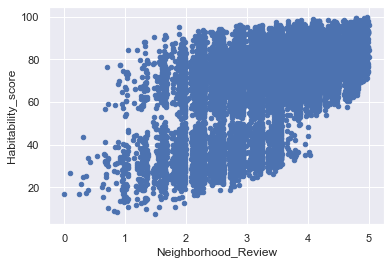

In [29]:
# scatter plot neighbourhood_review/habitability_score
data = pd.concat([df_train['Habitability_score'], df_train['Neighborhood_Review']], axis=1)
data.plot.scatter(x='Neighborhood_Review', y='Habitability_score')

There does seem to be some positive correlation between neighborhood review and habitability scores. There are 2 clusters - corresponding to the 2 peaks of habitability score. It would be very useless to find a feature (or combination of features) that seperates the data into these 2 clusters.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Property_Area', ylabel='Habitability_score'>

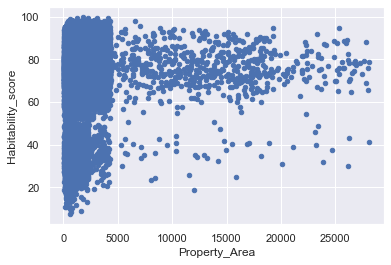

In [30]:
# scatter plot property_area/habitability_score
data = pd.concat([df_train['Habitability_score'], df_train['Property_Area']], axis=1)
data.plot.scatter(x='Property_Area', y='Habitability_score')

There seems to be little correlation between these two variables.

#### Categorical Features

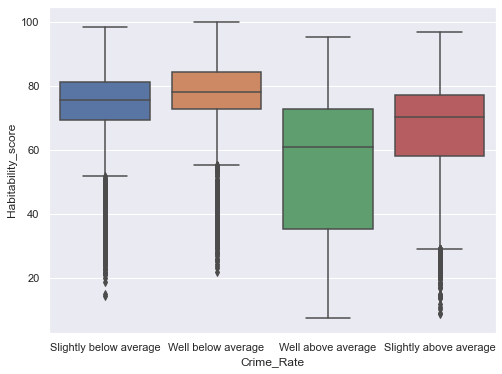

In [31]:
var = 'Crime_Rate'
data = pd.concat([df_train['Habitability_score'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Habitability_score', data=data)


To my surprise, there seems to be little correlation between crime rate and habitability score.

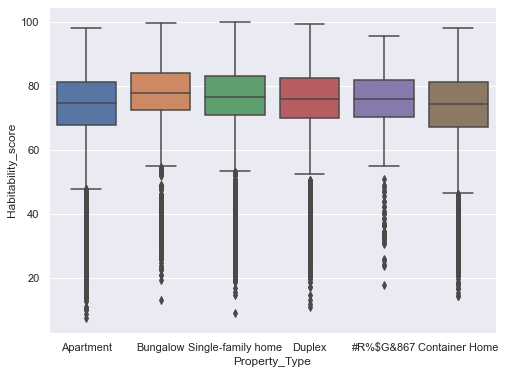

In [32]:
var = 'Property_Type'
data = pd.concat([df_train['Habitability_score'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Habitability_score', data=data)

Again, there looks to be very little correlation.

## More Thorough Relationship Exploration

<AxesSubplot:>

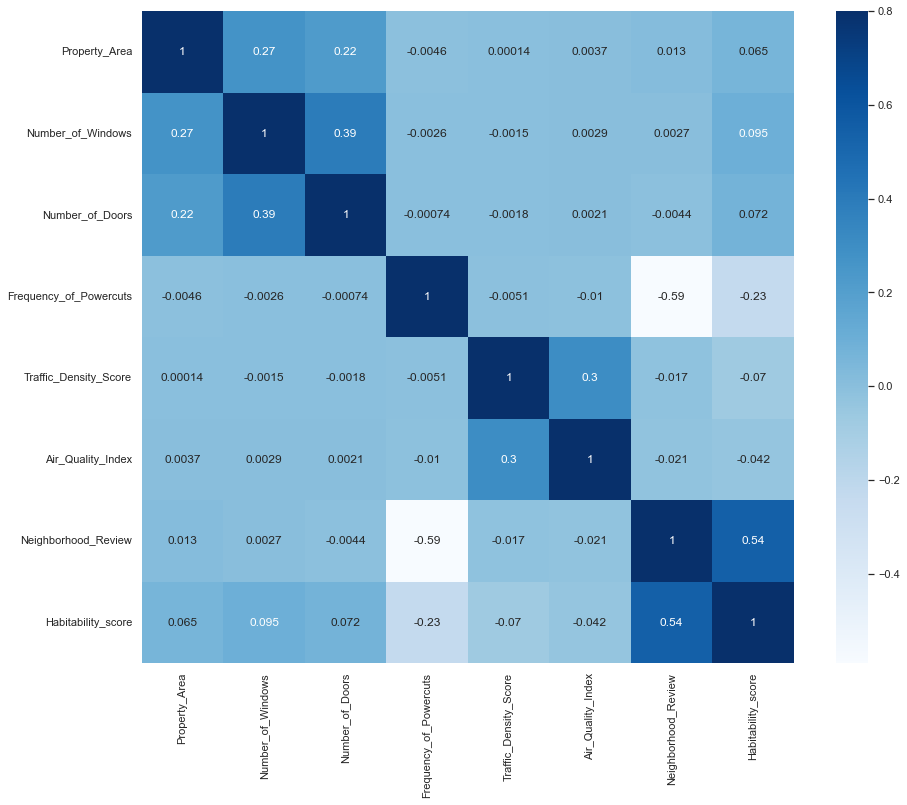

In [33]:
# correlation matrix
corrmatrix = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmatrix, vmax=0.8, cmap="Blues", annot=True, square=True)

Observations:

- Neighborhood_Review is the most correlated with Habitability_score
- Frequency_of_Powercuts is reasonably (negatively) correlated with Habitability_score
- The features Neighborhood_Review and Frequency_of_Powercuts are strongly (negatively) correlated. Perhaps I should remove Frequency_of_Powercuts. 
- The other features don't look immediately useful, but I can't remove all of them ... perhaps in combination they will help. Will need to experiment.

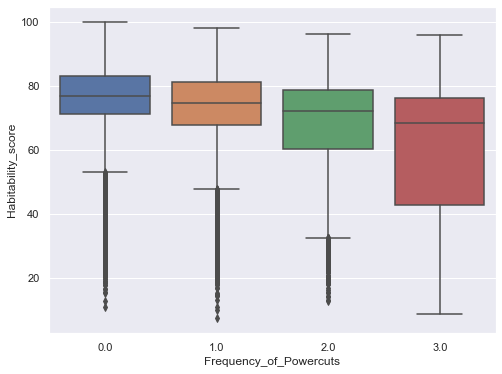

In [34]:
# Looking more closely at 'Frequency_of_Powercuts'
var = 'Frequency_of_Powercuts'
data = pd.concat([df_train['Habitability_score'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Habitability_score', data=data)

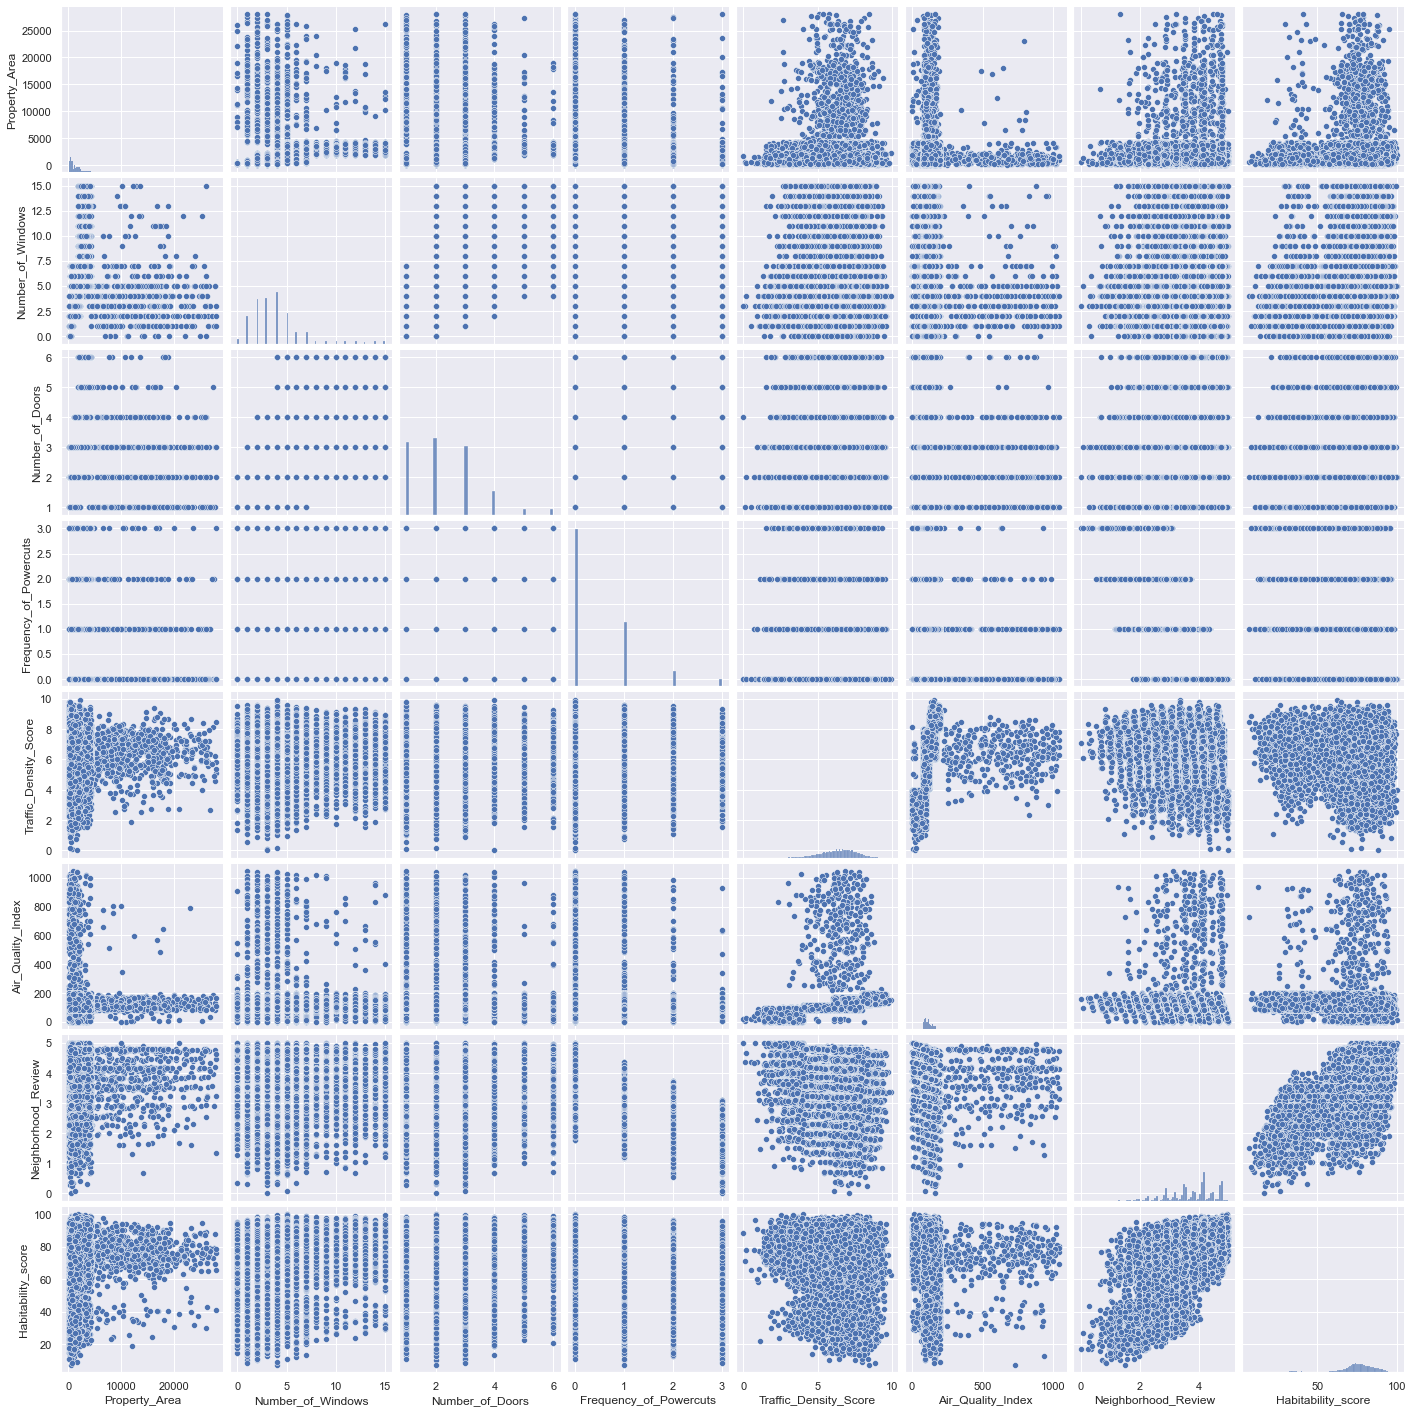

In [35]:
# scatterplot
sns.set()
cols = list(df_train.columns)
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

### Missing Data

In [36]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train.index)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Number_of_Windows,1654,0.041874
Frequency_of_Powercuts,1383,0.035014
Dust_and_Noise,1219,0.030862
Furnishing,1042,0.026380
Crime_Rate,787,0.019925
Property_ID,0,0.000000
Property_Type,0,0.000000
Property_Area,0,0.000000
Number_of_Doors,0,0.000000
Power_Backup,0,0.000000


Most features have no missing data, and the 5 features which do are missing only a very small percent. As `Crime_Rate`, `Furnishing` and `Dust_and_Noise` are all categorical features, I will simply inpute each missing value with the mode. 

In [37]:
df_train['Crime_Rate'] = df_train['Crime_Rate'].fillna(df_train['Crime_Rate'].mode()[0])
df_train['Furnishing'] = df_train['Furnishing'].fillna(df_train['Furnishing'].mode()[0])
df_train['Dust_and_Noise'] = df_train['Dust_and_Noise'].fillna(df_train['Dust_and_Noise'].mode()[0])

The features `Number_of_Windows` and `Frequency_of_Powercuts` are ordinal categorical features. I will fill each missing value with the mode. 

In [38]:
df_train['Number_of_Windows'].describe()

count    37845.000000
mean         3.923768
std          2.690992
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         15.000000
Name: Number_of_Windows, dtype: float64

In [39]:
df_train['Number_of_Windows'] = df_train['Number_of_Windows'].fillna(df_train['Number_of_Windows'].mode()[0])
df_train['Frequency_of_Powercuts'] = df_train['Frequency_of_Powercuts'].fillna(df_train['Frequency_of_Powercuts'].mode()[0])

In [40]:
# no more missing values! :)
df_train.isnull().sum().max()

0

Now to deal with any missing values in the test dataset. 

In [42]:
# missing data
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/len(df_test.index)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Number_of_Windows,445,0.042381
Frequency_of_Powercuts,366,0.034857
Dust_and_Noise,330,0.031429
Furnishing,257,0.024476
Crime_Rate,212,0.020190
Property_ID,0,0.000000
Property_Type,0,0.000000
Property_Area,0,0.000000
Number_of_Doors,0,0.000000
Power_Backup,0,0.000000


The same troublesome features. I'll deal with the missing values here in the same way I did the training data (making sure to use the modes calculated from the training dataset, to avoid data leakage). 

In [43]:
df_test['Crime_Rate'] = df_test['Crime_Rate'].fillna(df_train['Crime_Rate'].mode()[0])
df_test['Furnishing'] = df_test['Furnishing'].fillna(df_train['Furnishing'].mode()[0])
df_test['Dust_and_Noise'] = df_test['Dust_and_Noise'].fillna(df_train['Dust_and_Noise'].mode()[0])
df_test['Number_of_Windows'] = df_test['Number_of_Windows'].fillna(df_train['Number_of_Windows'].mode()[0])
df_test['Frequency_of_Powercuts'] = df_test['Frequency_of_Powercuts'].fillna(df_train['Frequency_of_Powercuts'].mode()[0])

In [44]:
# perfect!
df_test.isnull().sum().max()

0